In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import time
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("../data/processed/model_data.csv")

#### Split Data into Training and Test

In [3]:
y = np.ravel(data[['status']].values)
X = data.iloc[:,1:].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

#### Modeling

In [5]:
models = ['KNN', 'SVC', 'NuSVC', 'Bayesian', 'RandomForest']

In [6]:
def model_fit_score(model):
    if model == 'KNN':
        steps = [('knn', KNeighborsClassifier())]
        parameters = {'knn__n_neighbors':np.arange(1,50), 
                      'knn__weights': ['uniform','distance'],
                       'knn__algorithm':['auto','ball_tree','kd_tree','brute']}
    elif model == 'SVC':
        steps = [('svc', SVC())]
        parameters = {'svc__C':np.logspace(-3, 2, 6), 
                      'svc__kernel':['linear','poly','rbf','sigmoid']}
    elif model == 'NuSVC':
        steps = [('nusvc', NuSVC())]
        parameters = {'nusvc__nu':np.arange(0.1,1, .01),
                      'nusvc__kernel':['linear','poly','rbf','sigmoid']}
    elif model == 'Bayesian':
        steps = [('bayes', GaussianNB())]
        parameters = {'bayes__var_smoothing': np.logspace(-9,9,19)}
    elif model == 'RandomForest':
        steps = [('rf', RandomForestClassifier())]
        parameters = {'rf__n_estimators': np.arange(10,100,10),
                     'rf__criterion':['gini','entropy'],
                     'rf__max_depth':np.arange(10,100,10)}
    
    pipeline = Pipeline(steps)
    
    cv = GridSearchCV(pipeline, param_grid=parameters, cv=3)
    
    start_time = time.time()
    
    cv.fit(X_train, np.ravel(y_train))
        
    elapsed_time = time.time() - start_time
    
    print('Evaluation in {:.2f} seconds'.format(elapsed_time))
    
    print(str(model)+" Best params:", cv.best_params_)
    print(str(model)+" Best score:", cv.best_score_)
    
    y_pred = cv.predict(X_test)
    
    print(classification_report(y_test, y_pred, zero_division=0))
    plot_confusion_matrix(cv, X_test, y_test)
    plt.title(model + " Confusion Matrix")
    plt.show()
    

#### K-Nearest Neighbors Model

Evaluation in 3.64 seconds
KNN Best params: {'knn__algorithm': 'auto', 'knn__n_neighbors': 21, 'knn__weights': 'uniform'}
KNN Best score: 0.4831541218637993
              precision    recall  f1-score   support

           0       0.47      0.53      0.50        15
           1       0.00      0.00      0.00         9
           2       0.36      0.53      0.43        15

    accuracy                           0.41        39
   macro avg       0.28      0.36      0.31        39
weighted avg       0.32      0.41      0.36        39



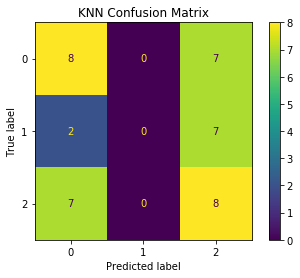

In [7]:
model_fit_score(models[0])

#### SVC Model

Evaluation in 2.56 seconds
SVC Best params: {'svc__C': 0.01, 'svc__kernel': 'linear'}
SVC Best score: 0.4838709677419355
              precision    recall  f1-score   support

           0       0.31      0.27      0.29        15
           1       0.00      0.00      0.00         9
           2       0.31      0.53      0.39        15

    accuracy                           0.31        39
   macro avg       0.21      0.27      0.23        39
weighted avg       0.24      0.31      0.26        39



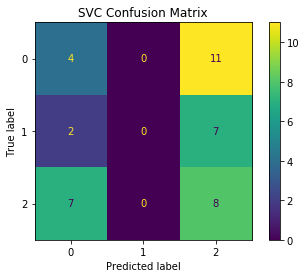

In [8]:
model_fit_score(models[1])

#### NuSVC Model

Evaluation in 26.07 seconds
NuSVC Best params: {'nusvc__kernel': 'linear', 'nusvc__nu': 0.5799999999999997}
NuSVC Best score: 0.5157706093189964
              precision    recall  f1-score   support

           0       0.61      0.93      0.74        15
           1       0.67      0.44      0.53         9
           2       0.60      0.40      0.48        15

    accuracy                           0.62        39
   macro avg       0.63      0.59      0.58        39
weighted avg       0.62      0.62      0.59        39



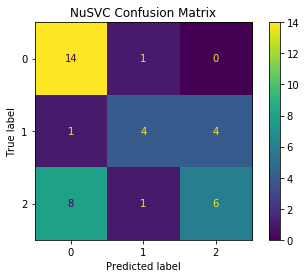

In [9]:
import warnings
warnings.filterwarnings("ignore")

model_fit_score(models[2])

#### Bayesian Model

Evaluation in 0.14 seconds
Bayesian Best params: {'bayes__var_smoothing': 1e-06}
Bayesian Best score: 0.4827956989247311
              precision    recall  f1-score   support

           0       0.56      0.93      0.70        15
           1       0.67      0.22      0.33         9
           2       0.73      0.53      0.62        15

    accuracy                           0.62        39
   macro avg       0.65      0.56      0.55        39
weighted avg       0.65      0.62      0.58        39



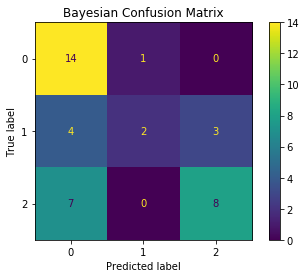

In [10]:
model_fit_score(models[3])

#### Random Forest Model

Evaluation in 57.78 seconds
RandomForest Best params: {'rf__criterion': 'entropy', 'rf__max_depth': 10, 'rf__n_estimators': 40}
RandomForest Best score: 0.5602150537634408
              precision    recall  f1-score   support

           0       0.52      0.73      0.61        15
           1       0.00      0.00      0.00         9
           2       0.44      0.47      0.45        15

    accuracy                           0.46        39
   macro avg       0.32      0.40      0.35        39
weighted avg       0.37      0.46      0.41        39



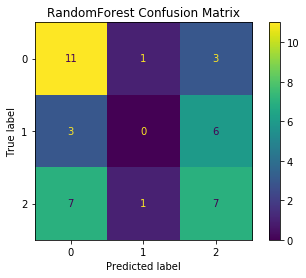

In [11]:
model_fit_score(models[4])